In [6]:
Output = ('/Users/alexis/Library/Clouexposuretorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.6. Yael RNAseq Grant/P1005.6.3. Analyses/P1005.6.3.2. Box Plots/Output')
cur_date = "011224"

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
count_df = data.frame(read_excel("Input/Yael_Counts_120223.xlsx")) 
subject_info_df = data.frame(read_excel("Input/SubjectInfo_120223.xlsx", sheet = 2))

In [7]:
head(count_df)
head(subject_info_df)

,Gene,X1911_1,X1911_19,X1911_2,X1911_20,X1911_21,X1911_22,X1911_3,X1911_4,X1911_55,⋯,X2009_14,X2009_15,X2009_2,X2009_3,X2009_4,X2009_5,X2009_6,X2009_7,X2009_8,X2009_9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHAC1_1279,56,20,12,22,12,25,23,17,27,⋯,57,90,14,18,33,46,17,15,36,13
2,GLRX_2674,124,581,356,358,661,657,304,561,421,⋯,530,462,599,503,677,272,447,477,475,454
3,MEFV_4116,0,0,0,0,0,1,5,0,3,⋯,0,0,0,4,0,0,0,1,0,0
4,STXBP1_6866,55,95,172,120,121,77,200,97,85,⋯,109,99,121,92,71,132,136,143,165,183
5,AKAP8L_196,93,37,35,28,50,26,41,24,33,⋯,84,53,32,20,51,26,28,34,36,33
6,AKR1C1_199,670,723,513,415,1112,418,559,385,767,⋯,836,492,642,524,381,185,546,529,214,400


,Original_Sample_ID,Original_Subject_No,Subject_No,Subject_ID,Sample_ID,Replicate,Sex,Race,Ethnicity,Age,BMI,Disease_Status,Exposure,Medium
,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,X1911_62,NBL 190,1,AS_1,AS_1_C.1,1,F,B,NH,47,23.7,AS,C,Air
2,X1911_56,NBL 190,1,AS_1,AS_1_F.1,1,F,B,NH,47,23.7,AS,F,PGGLY
3,X1911_20,NBL 190,1,AS_1,AS_1_C.2,2,F,B,NH,47,23.7,AS,C,Air
4,X1911_2,NBL 190,1,AS_1,AS_1_S.1,1,F,B,NH,47,23.7,AS,S,PGGLY
5,X1911_64,NBL 193,2,AS_2,AS_2_C.1,1,F,W,NH,19,19.5,AS,C,Air
6,X1911_58,NBL 193,2,AS_2,AS_2_F.1,1,F,W,NH,19,19.5,AS,F,PGGLY


Comparing the gene, KLF4, across exposure groups in the crude model using box plots. 

In [9]:
# first replacing the column names in the count df with sample ids that are more descriptive of the subjects
cleaned_count_df = count_df %>%
    separate(Gene, sep = "_", c("Gene", NA)) %>%
    relocate(.after = Gene, subject_info_df$Original_Sample_ID) %>%
    # filtering for gene of interest
    filter(Gene == 'KLF4')

colnames(cleaned_count_df)[2:40] = subject_info_df$Sample_ID
head(cleaned_count_df)

,Gene,AS_1_C.1,AS_1_F.1,AS_1_C.2,AS_1_S.1,AS_2_C.1,AS_2_F.1,AS_2_C.2,AS_2_S.1,AS_3_C.1,⋯,NAS_8_C.2,NAS_8_S.1,NAS_9_C.1,NAS_9_F.1,NAS_9_C.2,NAS_9_S.1,NAS_10_C.1,NAS_10_F.1,NAS_10_C.2,NAS_10_S.1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,KLF4,738,1678,587,1503,624,1096,712,782,811,⋯,554,1165,486,736,522,827,855,1173,864,1717


In [25]:
# pivoting longer to average the replicate control samples
longer_count_df = cleaned_count_df %>%
    pivot_longer(cols = 2:40, names_to = "Sample_ID", values_to = "Value") %>%
    # averaging count data across the replicate genes
    inner_join(subject_info_df[4:14]) %>%
    separate(Sample_ID, sep = "\\.", c("Sample_ID", NA)) %>%
    group_by(Sample_ID) %>%
    mutate(Value = round(mean(Value))) %>%
    select(-Gene) %>%
    # changing exposure classes for interpretability
    mutate(Exposure = ifelse(Exposure == "C", "Control",
                            ifelse(Exposure == "S", "Nicotine Salts",
                                   ifelse(Exposure == "F", "Freebase Nicotine", NA))))

head(longer_count_df)

Joining with `by = join_by(Sample_ID)`


Sample_ID,Value,Subject_ID,Replicate,Sex,Race,Ethnicity,Age,BMI,Disease_Status,Exposure,Medium
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
AS_1_C,662,AS_1,1,F,B,NH,47,23.7,AS,Control,Air
AS_1_F,1678,AS_1,1,F,B,NH,47,23.7,AS,Freebase Nicotine,PGGLY
AS_1_C,662,AS_1,2,F,B,NH,47,23.7,AS,Control,Air
AS_1_S,1503,AS_1,1,F,B,NH,47,23.7,AS,Nicotine Salts,PGGLY
AS_2_C,668,AS_2,1,F,W,NH,19,19.5,AS,Control,Air
AS_2_F,1096,AS_2,1,F,W,NH,19,19.5,AS,Freebase Nicotine,PGGLY


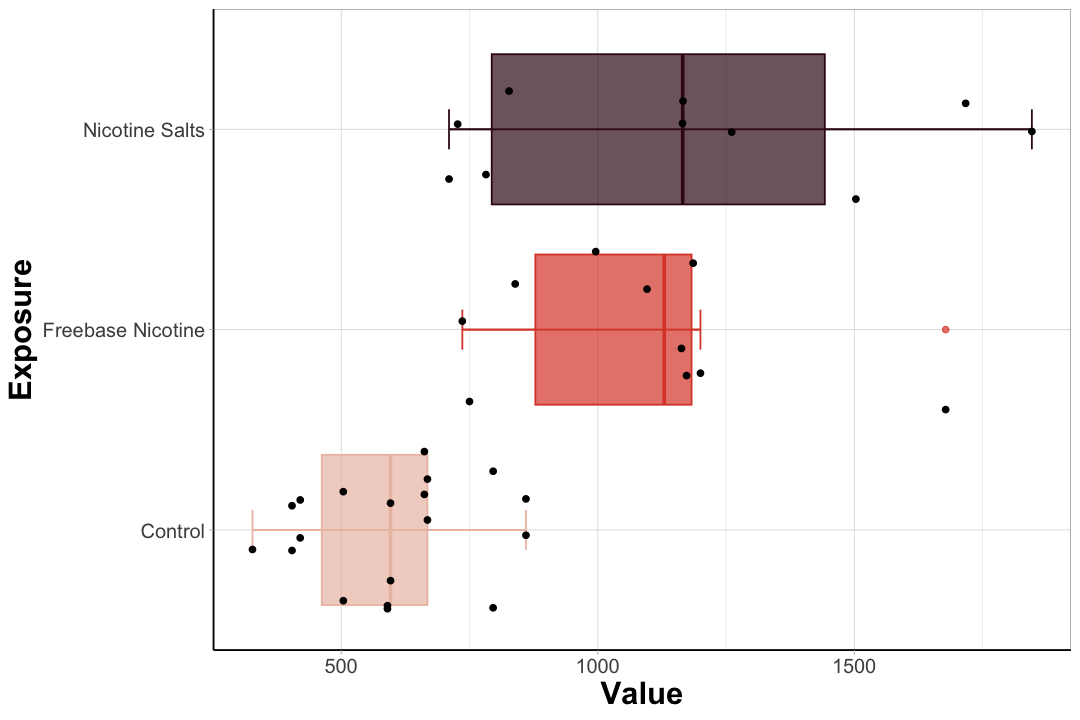

In [37]:
options(repr.plot.width=9, repr.plot.height=6) #changing size

ggplot(longer_count_df, aes(y = Exposure, x = Value)) + 
  stat_boxplot(geom = "errorbar", width = 0.2, aes(color = Exposure)) + # changes width of whiskers
  geom_boxplot(aes(color = Exposure, fill = Exposure), alpha = 0.7) + 
  geom_point(position = position_jitter(w = 0.1), alpha = 1) + 

  theme_light() + 
  theme(#axis.text.x = element_text(angle = 45, hjust = 0.97), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none",
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 

scale_color_manual(values = c('#ECC0B0','#DC4731','#3B0918')) +
scale_fill_manual(values = c('#ECC0B0','#DC4731','#3B0918'))